In [1]:
%matplotlib inline

import sys
import os
from os.path import join
from pathlib import Path
sys.path.append(join(Path(os.getcwd()).parent, 'lib'))
import pandas as pd
import numpy as np
import json
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (15,7)

def plotar(batch):  
    for n,c in enumerate(batch):
        ax, s = plt.subplots()
        title = deg(mm[c].rolling(window=100).mean())     
        mm[c].plot(title=str(c)+'_'+str(title))
        mm[c].rolling(window=100).mean().plot()

def div_batch(x, n_batches):
    l=[]
    batch_size = int(len(x)/n_batches)
    for i in range(0, n_batches*batch_size, batch_size):
        l.append(x[i:i+batch_size])
    l.append(x[(batch_size*n_batches-1):])
    return l

def ps(x):
    return pd.Series(x)

with open('../../info/info-EDP-ES.json','rt') as p:
    data = json.load(p)

mm_path = data['paths']['mm']['input']
mm = pd.read_csv(mm_path, sep=';', index_col = 0, parse_dates=[0])
mm.fillna(value=0, inplace=True)
l = div_batch(mm.columns, 60)

In [2]:
COLS_LISTA = data['lista2']['columns']
LISTA_CAD_PATH = data['paths']['lista']

try:
    LISTAF = pd.read_csv(LISTA_CAD_PATH, names = COLS_LISTA, header=0, sep=';',engine='python')
except:
    LISTAF = pd.read_csv(LISTA_CAD_PATH, names = COLS_LISTA, header=0, engine='python')

In [3]:
LISTAF['instalacao'] = pd.DataFrame(LISTAF['instalacao'].apply(lambda x: '{0:0>10}'.format(x)))
try:
    LISTAF['medidor'] = pd.DataFrame(LISTAF['medidor'].astype(int).apply(lambda x: '{0:0>8}'.format(x)))
except:    
    LISTAF['medidor'] = pd.DataFrame(LISTAF['medidor'].apply(lambda x: '{0:0>8}'.format(x)))

In [4]:
LISTAF[LISTAF['instalacao']=='0000693723']

,cliente,instalacao,medidor,data_inicio,data_fim,lote,ssn,5,6,7,8,troca
916,MM METAIS LTDA ME,0000693723,13336927,01/01/2015,31/12/2099,NaN,89550532220005896781,29/05/2019,27/06/2019,26/07/2019,28/08/2019,1-Sem troca de medidor


In [5]:
df = mm['13336927']


In [6]:
df[df < 0] = 0

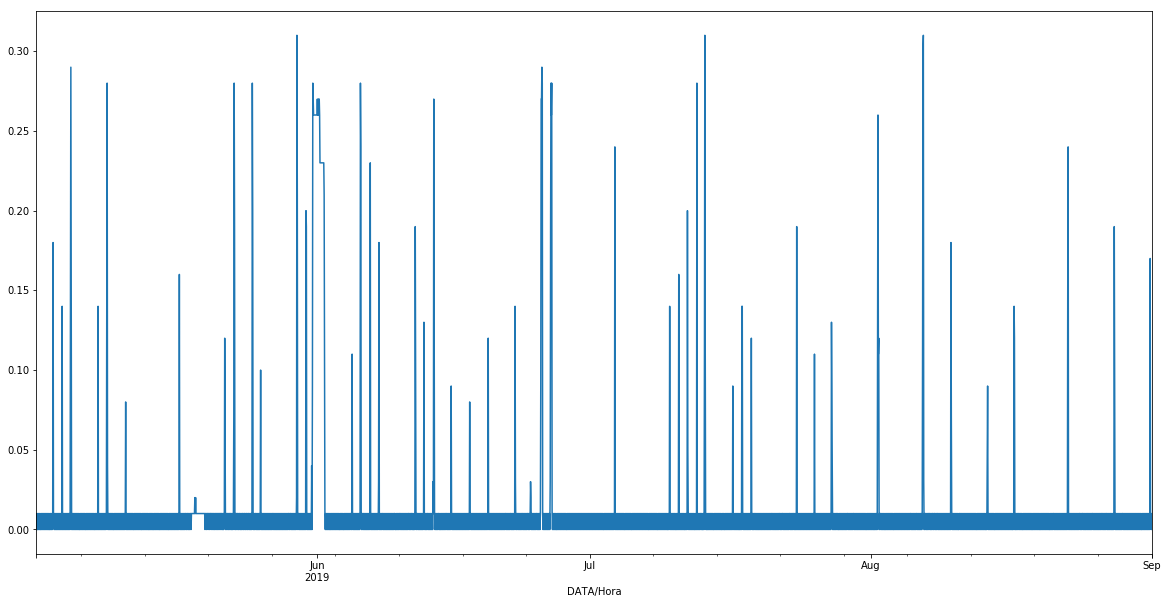

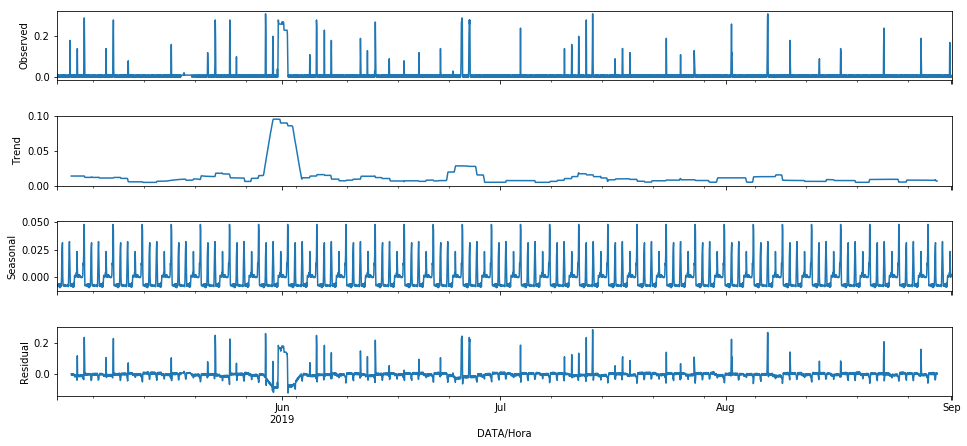

In [7]:

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import read_csv
from pandas import datetime
plt.subplots(figsize=(20, 10))

df.plot()


stl = seasonal_decompose(df, freq=24*4, model='additive')
fig = stl.plot()
fig.set_size_inches(15, 7)


df_resid = stl.resid
df_seasonal = stl.seasonal
df_trend = stl.trend

In [8]:
def integrate(y_vals, h):
    i = 1
    total = y_vals[0] + y_vals[-1]
    for y in y_vals[1:-1]:
        if i % 2 == 0:
            total += 2 * y
        else:
            total += 4 * y
        i += 1
    return total * (h / 3.0)

In [10]:
interval = 1
window = 10
min_area = 999999999
max_area = 0
morro = False
for i in range(0, len(df)):
    area = integrate(df.iloc[i:i+window], interval)
    if area < min_area:
        min_area = area
    if area > max_area:
        max_area = area
    if (max_area >= min_area * 3) and (3*area <= max_area):
        morro = True
print("min area", min_area)
print("max area", max_area)
print('morro', morro)

min area 0.0
max area 2.2800000000000002
morro True


In [ ]:
from __future__ import print_function

import numpy as np
from scipy.integrate import simps
from numpy import trapz
area = trapz(df, dx=1)
print("area =", area)

In [ ]:
x = pd.DataFrame(df_trend)

In [ ]:
x[x.iloc[:,0] > 0]

In [ ]:
df_resid = pd.DataFrame(df_resid, columns = ['mm'])

In [ ]:
pd.DataFrame(df_resid, columns = ['mm'])

In [ ]:
df_resid.notna()

In [ ]:
mean = np.mean(df_resid['mm'])

In [ ]:
mean

In [ ]:
std = np.std(df_resid, ddof=1)

In [ ]:
df_resid

In [ ]:
mean = np.mean(df_resid['mm'])
std = np.std(df_resid['mm'], ddof=1)
df_resid['STD'] = (df_resid- mean) / std

df_resid['outlier'] = np.where(((df_resid['STD']>3) | (df_resid['STD']<-3)), df, 0)
df_anom = df_resid[(df_resid['outlier'] != 0)]


# Calculo share de anomalias
base_count = df.shape[0] # count() nao retorna os NAN
anom_count = df_anom.shape[0]
anom_share = anom_count / base_count
print("{0:.2f}%".format(float(anom_share) * 100)) # share de anomalias

fig, ax = plt.subplots()
df.plot(color = 'red', linestyle='dashed', linewidth = 0.5, x=ax)
df_anom['outlier'].plot(style='bo', ax=ax)

plt.xlabel('Time')
plt.ylabel('mm')
plt.title('Count vs Time | '+ str("{0:.2f}%".format(float(anom_share) * 100)) + ' de Anomalias')
plt.subplots_adjust(bottom=0.2)

fig = plt.gcf()
fig.set_size_inches(20, 10)

In [ ]:
residual[residual > 5]

------

In [ ]:
df['2019-06-05 00:00:00':'2019-06-05 23:59:59']

In [ ]:
def aglut(*args):
    lo = args[0].copy()
    for l in args[1:]:
        lo.extend(l)
    return lo

In [ ]:
def deg(x,o='left'):
    h1 = x[int(len(x)/2):].mean()
    h2 = x[:int(len(x)/2)].mean()
    if h1 > h2 * factor:
        a = 1 
    elif h1 < h2 / factor:
        a = -1        
    else:
        a=0
    if len(x)>=limite:  
        if o == 'right':
            return aglut([a], deg(x[int(len(x)/2):], o = 'right'))
        else:
            return aglut(deg(x[:int(len(x)/2)]), [a])    
    else:
        return [a]

In [ ]:
def plotar2(mm, n):  
    for i in range(n):
        cols = mm.columns        
        v = int(np.random.sample() * len(cols) )
        s0 = mm[cols[v]]
        s1 = mm[cols[v]].clip(0,mm[cols[v]].quantile(0.99))
        s2=s1.rolling(window=500).mean().dropna()
        title = (aglut(deg(s1.rolling(window=500).mean().dropna()), deg(s1.rolling(window=500).mean().dropna(), o = 'right')))
        if cv(title):
            ax, s = plt.subplots()
            s0.plot()
            s1.plot()
            s2.plot(title=str(title))        

In [ ]:
def cv(x):
    se0, se1, se2 = False, False, False
    for i in x:
        if se2:
            return 1
        if i == 0:            
            se0 = True
            if se1:
                se2 = True   
        elif i == -1 and se0:
            se1 = True   
        elif i == 1:
            return 0
    return 0

In [ ]:
def cv2(x):
    se0, se1, se2 = False, False, False
    for i in x:
        if se2:
            return 1
        if i == 0:            
            se0 = True 
        elif i == -1 and se1:
            se2 = True
        elif i == 1 and se0:
            se1 = True   
    return 0

In [ ]:
factor=1.3
limite=int(mm.shape[0]/512)
plotar2(mm, 50)